Linear Regression

In [90]:
# importing packages and libraries 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


from sklearn.model_selection import train_test_split

In [163]:
from scipy.stats import pearsonr,shapiro,kstest
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [92]:
# Reading the data set 
df=pd.read_csv("Fish_dataset.csv")

In [93]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [94]:
# checking for null values 
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

## 1. Plot a bar chart showing count of individual species?

In [95]:
# Finding the counts of the species feature 
data=pd.DataFrame(df['Species'].value_counts())
data

,Species
Perch,56
Bream,35
Roach,20
Pike,17
Smelt,14
Parkki,11
Whitefish,6


<AxesSubplot:xlabel='Species Name', ylabel='Species'>

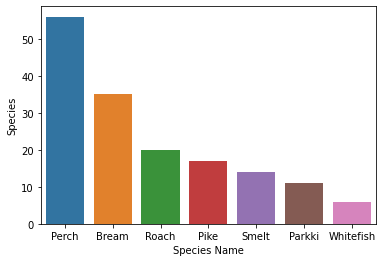

In [96]:
# bar chart 
plt.xlabel('Species Name')
plt.ylabel('Species Count')
sns.barplot(data=data,x=data.index,y=data.Species)

## Q.2 Identify outliers and remove if any?

In [97]:
# removing the feature record with vales having zeros because weight cannot be zero practically.
df.drop(df[df['Weight']==0].index)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


### Finding the outliers

<AxesSubplot:ylabel='Weight'>

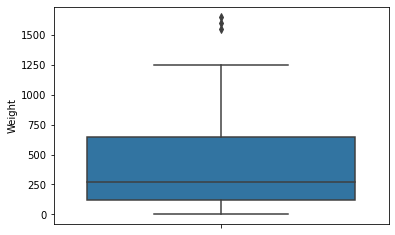

In [98]:
#weight has outliers since its our dependent variable we should handle the outliers
sns.boxplot(data=df,y='Weight') 

In [99]:
# since the outliers values are above the range of 1250 we are removing it with a condition 
df.drop(df.index[df.Weight>1250],axis=0,inplace=True)

<AxesSubplot:ylabel='Weight'>

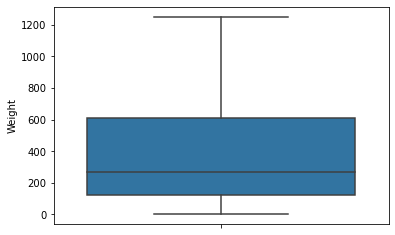

In [153]:
sns.boxplot(data=df,y='Weight')

In [ ]:
#other dependent variables are also having outliers but we are not removing it since it will affect the dependent variable.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length1'>

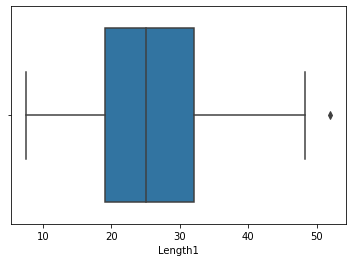

In [101]:
sns.boxplot(df.Length1)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length2'>

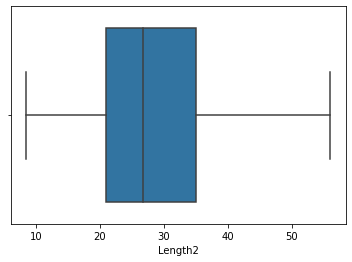

In [102]:
sns.boxplot(df.Length2)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length3'>

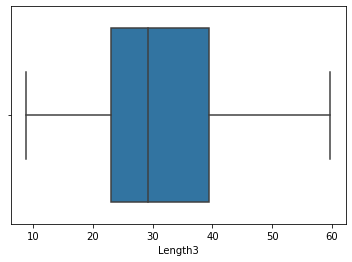

In [103]:
sns.boxplot(df.Length3)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height'>

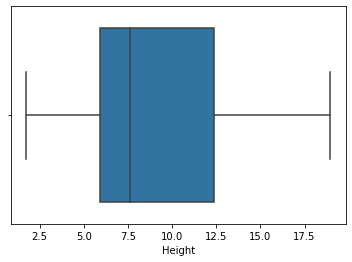

In [104]:
sns.boxplot(df.Height)
# no outliers are there

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Width'>

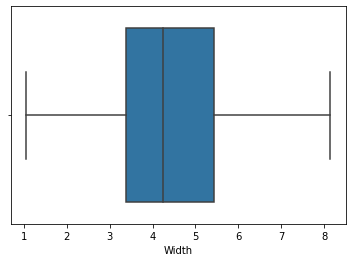

In [188]:
sns.boxplot(df.Width)
# no outliers are there after removing it

In [106]:
df.describe()# 

,Weight,Length1,Length2,Length3,Height,Width
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,375.217308,25.655769,27.786538,30.571154,8.951128,4.375719
std,319.546978,9.119630,9.792651,10.695359,4.324325,1.672188
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.000000,21.000000,23.025000,5.931675,3.369600
50%,271.000000,25.000000,26.750000,29.250000,7.647800,4.243300
75%,612.500000,32.125000,35.000000,39.425000,12.378550,5.424375
max,1250.000000,52.000000,56.000000,59.700000,18.957000,8.142000


In [107]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [154]:
# Tyoe casting the feature into categorical type

In [109]:
df.Species=df.Species.astype('category')

In [110]:
df.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

# EDA       

# 3.Build a regression model and print regression equation?

In [ ]:
# seperating the dependent and independent variable

In [155]:
# dependent variable here its weight feature 
DEP=df.iloc[:,1]
DEP

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 156, dtype: float64

In [112]:
# other features are independent feature
IDV=df[['Species','Length1','Length2','Length3','Height','Width']]
IDV

,Species,Length1,Length2,Length3,Height,Width
0,Bream,23.2,25.4,30.0,11.5200,4.0200
1,Bream,24.0,26.3,31.2,12.4800,4.3056
2,Bream,23.9,26.5,31.1,12.3778,4.6961
3,Bream,26.3,29.0,33.5,12.7300,4.4555
4,Bream,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,13.2,14.3,15.2,2.8728,2.0672


In [113]:
#Independet categorical variable
IDV_CAT=pd.DataFrame(IDV[['Species']])
IDV_CAT

,Species
0,Bream
1,Bream
2,Bream
3,Bream
4,Bream
...,...
154,Smelt
155,Smelt
156,Smelt
157,Smelt


In [114]:
# indepednet Numerical variable 
IDV_NUM=IDV.iloc[:,1:]
IDV_NUM

,Length1,Length2,Length3,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...
154,11.5,12.2,13.4,2.0904,1.3936
155,11.7,12.4,13.5,2.4300,1.2690
156,12.1,13.0,13.8,2.2770,1.2558
157,13.2,14.3,15.2,2.8728,2.0672


<AxesSubplot:>

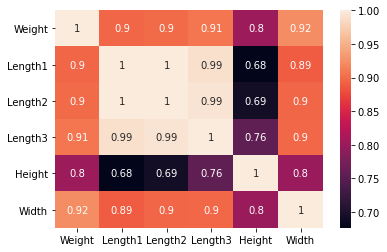

In [156]:
# to find how independent and dependant variable on how its correlated to eachother?
sns.heatmap(df.iloc[:,1:].corr(),annot=True)

# Univariate analysis

In [ ]:
# graphical method for dependent variable 

<AxesSubplot:xlabel='Weight', ylabel='Density'>

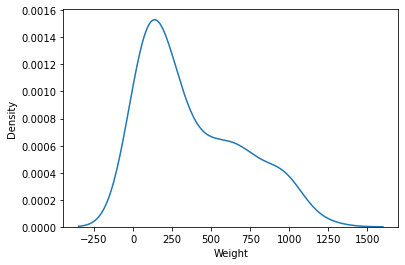

In [157]:
sns.kdeplot(DEP) # Kdepllot is used to identify the distribution of data of the dependent variable

In [ ]:
# Statistical method test to check the linearity significance

In [117]:
# shapiro test is done to find wheather it is used to find dependent variable is normaly distributed or not.
s,p=shapiro(DEP)
if p>0.05:
    print("significant")
else:
    print(" not significant")

 not significant


In [158]:
# finding the Linearity relation between Dependent and Independent variable using pearsonr method
for i in IDV_NUM:
    r,p=pearsonr(DEP,IDV_NUM[i])
    print(i,r,p)
    if p>0.05:
        print("Not significant")
    else:
        print("Significant")

Length1 0.8957425609788278 4.34372338786654e-56
Significant
Length2 0.8997590509506709 2.4714981862122261e-57
Significant
Length3 0.9072921554536854 8.113849316458209e-60
Significant
Height 0.8018712156822994 2.867672256971377e-36
Significant
Width 0.9234321722602117 6.124586053795755e-66
Significant


#### Bivariat analysis for indepent numerical variable

In [159]:
# finding the linearity between the independent variable using statistical method
for i in IDV_NUM:
    for j in IDV_NUM:
        r,p = pearsonr(IDV_NUM[i],IDV_NUM[j])
        print(f'{i} and {j} ------> {r},{p}')
        if p>0.05:
            print("Not Significant.")
        else:
            print("Significant.")
        print()

Length1 and Length1 ------> 1.0,0.0
Significant.

Length1 and Length2 ------> 0.9994183105852784,7.219809345514062e-228
Significant.

Length1 and Length3 ------> 0.9906124044862433,5.2502584338582455e-135
Significant.

Length1 and Height ------> 0.676325953414473,3.3727542296509903e-22
Significant.

Length1 and Width ------> 0.8891659137401853,3.718801544616001e-54
Significant.

Length2 and Length1 ------> 0.9994183105852784,7.219809345514062e-228
Significant.

Length2 and Length2 ------> 1.0,0.0
Significant.

Length2 and Length3 ------> 0.9930492994505425,5.123355775300504e-145
Significant.

Length2 and Height ------> 0.6919539518671971,1.4918987250177315e-23
Significant.

Length2 and Width ------> 0.8955835283148015,4.854043147867683e-56
Significant.

Length3 and Length1 ------> 0.9906124044862433,5.2502584338582455e-135
Significant.

Length3 and Length2 ------> 0.9930492994505425,5.123355775300504e-145
Significant.

Length3 and Length3 ------> 0.9999999999999999,0.0
Significant.

Le

In [120]:
# normality test for the independt numerical variable
s,p=shapiro(IDV_NUM)
print(s,p)
if p>0.05:
    print("significant")
else:
    print(" not significant")

0.936906635761261 1.1799183017322817e-17
 not significant


## Multicolinearity

<AxesSubplot:>

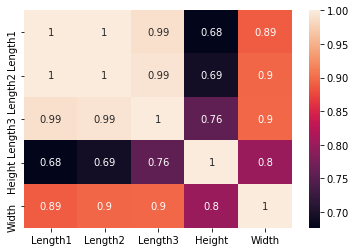

In [161]:
# graphical method
sns.heatmap(IDV_NUM.corr(),annot=True)
# This heat map shows how every indepent variables are corelated with each other  

<AxesSubplot:ylabel='Species'>

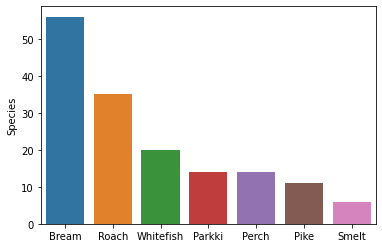

In [162]:
# graphical method for Independent categorical variable
sns.barplot(x=IDV_CAT.Species.unique(),y=IDV_CAT.Species.value_counts(),data=IDV_CAT)

<AxesSubplot:xlabel='Height', ylabel='Width'>

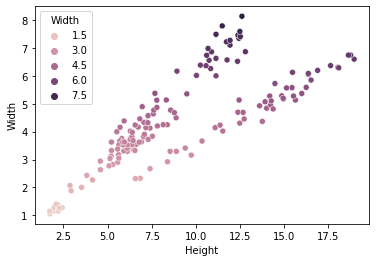

In [123]:
# to find the relation between the two independent variable
sns.scatterplot(x=IDV_NUM.Height,y=IDV_NUM.Width,data=IDV_NUM,hue='Width')

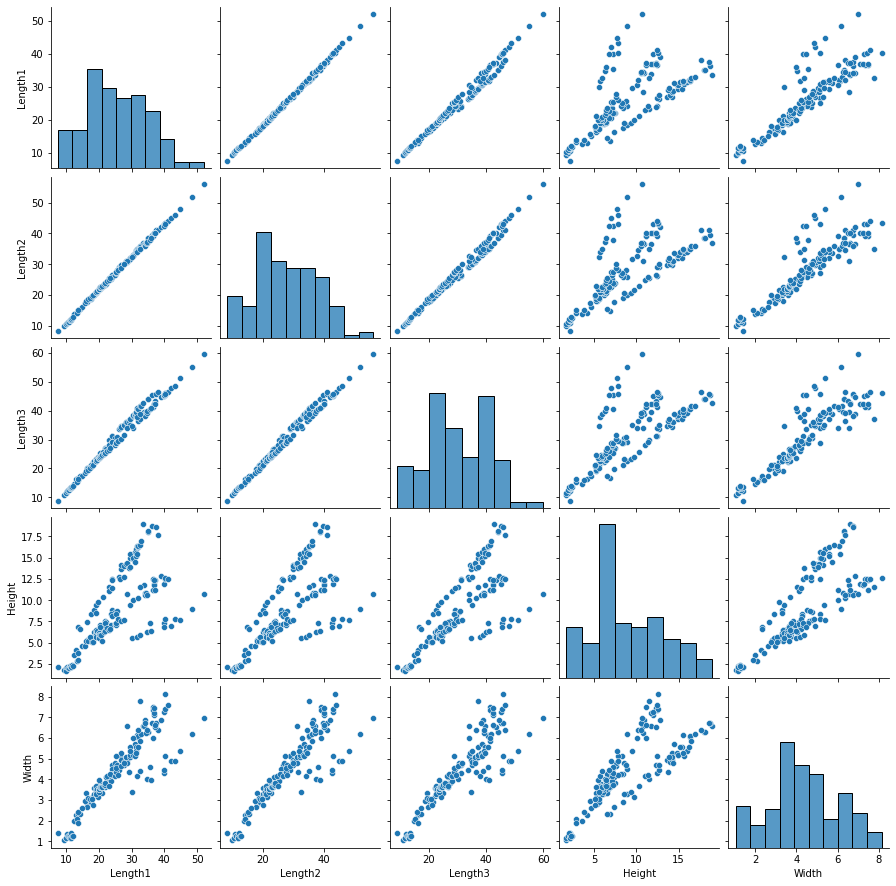

In [124]:
sns.pairplot(IDV)

In [ ]:
# VIF is used to find the multicoliearity so that we can identify which feature can be treated

In [164]:
for i in range(len(IDV_NUM.columns)):
    print(f'{IDV_NUM.columns[i]}------>{variance_inflation_factor(IDV_NUM.values,i)}')

Length1------>11851.606958399318
Length2------>15437.668441672933
Length3------>3162.4841264495817
Height------>75.87834205065113
Width------>96.76421237834869


## Building a model

In [165]:
# we did not take categorical because its string type

x=IDV_NUM.iloc[:,0:5]
x

,Length1,Length2,Length3,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...
154,11.5,12.2,13.4,2.0904,1.3936
155,11.7,12.4,13.5,2.4300,1.2690
156,12.1,13.0,13.8,2.2770,1.2558
157,13.2,14.3,15.2,2.8728,2.0672


In [166]:
y=DEP
y

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 156, dtype: float64

In [167]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.3)

In [130]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(109, 5)
(47, 5)
(109,)
(47,)


In [168]:
from sklearn.linear_model import LinearRegression

In [169]:
lr=LinearRegression()

In [170]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [134]:
lr.coef_ # finding the coefficient value 

array([ 98.42430746, -41.22150053, -34.93149523,  37.05966497,
        42.59063985])

In [171]:
lr.intercept_ # finding the intercept value

-416.61083071262715

In [172]:
# predicting the value 
train_pred=lr.predict(xtrain)
train_pred

array([ 431.96061517,  692.92481978,  663.57582376, -124.52024764,
        843.3558917 ,  640.69362195,  174.02901629,  377.12194229,
        213.72078533,  369.1737104 ,  688.05937536,   56.89077101,
        506.56573926,  295.16362655,  167.83425699,  352.44113345,
       -136.29755998,  453.25478383,  285.25634548,  648.153491  ,
        159.88556344,  287.94178336,  557.75437383,  518.60691506,
        739.14577914,  920.00117629,  174.91005309,  576.01957198,
         -9.38704745,  821.8042928 ,  386.53934801,  259.53571498,
        784.35907465,  556.7904506 ,  100.3222715 ,  496.42108695,
        759.27375516,  147.22239598,  287.74774945, -121.85425738,
        178.25984478,  605.04342193,  802.96072504,  710.23418744,
        560.88934049,  651.12910684,  585.46803632,  225.424657  ,
        259.9329145 ,  103.98365665,  427.56529586,  907.82399683,
        -62.01444561, -207.32774341,  151.93686989,  181.3834668 ,
        827.41560557,  222.85405736,  -69.86140226, -142.59152

In [137]:
# finding the error 
error=ytrain-train_pred
error

109   -111.139280
15     -19.832925
108    -96.087611
16      95.341778
71    -113.949091
          ...    
113    -39.755891
36      52.893311
148    183.628497
157    111.501903
54     -98.692016
Name: Weight, Length: 109, dtype: float64

<AxesSubplot:xlabel='Weight', ylabel='Density'>

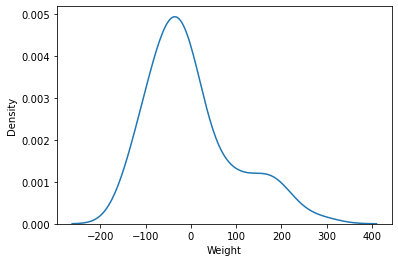

In [173]:
# to find how the error is distributed
sns.kdeplot(error)

In [139]:
# used to find the accuracy
from sklearn.metrics import mean_squared_error,r2_score

In [140]:
mean_squared_error(train_pred,ytrain) # finding the error between actual and predicted using MSE

9134.651071442235

In [141]:
np.sqrt(mean_squared_error(train_pred,ytrain)) # RMSE  is used as to optmize the mse 

95.57536853940054

In [174]:
r2_score(ytrain,train_pred) # accuracy of the model

0.895443128159282

In [175]:
test_pred=lr.predict(xtest)
test_pred

array([ 898.40113614,  669.45104826,  451.42072261,  520.44595961,
        128.907311  ,  847.01586731,  217.8931711 ,  713.52317315,
        361.20319286,  135.02336411,  425.67526754,  418.5565174 ,
        163.35407352,  858.08462303,  285.98266495,  -76.21830411,
        724.36507369,  453.53502133,  654.90263118,  772.06110561,
        616.59971322,   95.45772422,  878.43567722,  537.07849413,
        249.18893489,  568.70898902,   87.65799519,  602.6857565 ,
        171.11424707,  239.15854604,  596.78501575,  421.35468441,
        924.89259952,  234.14205742,  384.64595891, -160.01920154,
        551.87226269, -131.05905518,   35.44858457, -138.08192205,
        142.87820838,  633.19165792,  871.74652249,  789.89089576,
        871.4147761 ,  206.8670622 ,  178.54140428])

In [176]:
error2=ytest-test_pred
error2

125    201.598864
139    100.548952
5       -1.420723
12     -20.445960
83     -13.907311
124    152.984133
44     -72.893171
115    -23.523173
57     -55.203193
82     -25.023364
108   -105.675268
3      -55.556517
85     -33.354074
32      66.915377
55     -15.982665
158     96.118304
112    -39.365074
4      -23.535021
25      70.097369
111     67.938894
22       3.400287
79     -15.457724
33      96.564323
10     -62.078494
67     -79.188935
134   -112.708989
81      -2.657995
136    -62.685756
40    -171.114247
47     -79.158546
17     103.214984
71    -121.354684
127     75.107400
97     -89.142057
101   -166.645959
146    167.519202
13    -211.872263
152    140.959055
76      34.551415
148    147.781922
42     -22.878208
20     -58.191658
118    -51.746522
29     210.109104
34      78.585224
46     -66.867062
39     -58.541404
Name: Weight, dtype: float64

In [177]:
mean_squared_error(test_pred,ytest)

9458.893120397634

In [178]:
np.sqrt(mean_squared_error(test_pred,ytest))

97.25684099536461

In [179]:
r2_score(ytest,test_pred)

0.9160358214230627

In [180]:
import statsmodels.api as sm

In [181]:
xtrain1=sm.add_constant(xtrain)
xtrain1

,const,Length1,Length2,Length3,Height,Width
102,1.0,25.2,27.3,28.7,8.3230,5.1373
59,1.0,33.7,36.4,39.6,11.7612,6.5736
138,1.0,43.2,46.0,48.7,7.7920,4.8700
151,1.0,11.3,11.8,13.1,2.2139,1.2838
123,1.0,39.0,42.0,44.6,12.8002,6.8684
...,...,...,...,...,...,...
78,1.0,16.8,18.7,19.4,5.1992,3.1234
45,1.0,20.5,22.5,25.3,7.0334,3.8203
14,1.0,29.4,32.0,37.2,14.9544,5.1708
95,1.0,21.5,23.5,25.0,6.2750,3.7250


In [182]:
model=sm.OLS(ytrain,xtrain1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     176.4
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           7.69e-49
Time:                        11:31:57   Log-Likelihood:                -656.31
No. Observations:                 109   AIC:                             1325.
Df Residuals:                     103   BIC:                             1341.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -416.6108     30.309    -13.745      0.000    -476.722    -356.500
Length1      110.2132     42.219      2.611      0.010      26.483     193.944
Length2      -59.8192     42.995     -1.391      0.167    -145.090      25.451
Length3      -30.0409     16.696     -1.799      0.075     -63.154       3.073
Height        33.8242      8.576      3.944      0.000      16.816      50.833
Width         55.4606     20.981      2.643      0.009      13.849      97.072
==============================================================================
Omnibus:                       13.828   Durbin-Watson:                   2.217
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.596
Skew:                           0.922   Prob(JB):                     0.000411
Kurtosis:                       3.182   Cond. No.                         313.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 4. What is the mean score of the model at 95% confidence interval?

## 5.Compare real and predicted weights and give a conclusion statement based on it?

In [187]:
d=pd.DataFrame({'Original weight':ytest,'Pred_weight': test_pred})
d

,Original weight,Pred_weight
125,1100.0,898.401136
139,770.0,669.451048
5,450.0,451.420723
12,500.0,520.445960
83,115.0,128.907311
124,1000.0,847.015867
44,145.0,217.893171
115,690.0,713.523173
57,306.0,361.203193
82,110.0,135.023364


In [189]:
#on comparing the original and rough weight most of the values are like original weight < actual weight.